In [42]:
!pip install -q pandas_ta==0.3.14b0
!pip install bayesian-optimization

In [43]:
import pandas as pd


# Load the dataset
data = pd.read_csv('/content/eurusd_5_years.csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Preview cleaned data
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-10,1.178245,1.180200,1.174300,1.178273,1.178273,0
1,2020-08-11,1.173764,1.180498,1.172319,1.173778,1.173778,0
2,2020-08-12,1.173985,1.181265,1.171303,1.173654,1.173654,0
3,2020-08-13,1.179649,1.186400,1.179468,1.179380,1.179380,0
4,2020-08-14,1.181893,1.183800,1.178467,1.181656,1.181656,0
...,...,...,...,...,...,...,...
1297,2025-08-04,1.158668,1.158883,1.155095,1.158668,1.158668,0
1298,2025-08-05,1.158413,1.158816,1.153004,1.158413,1.158413,0
1299,2025-08-06,1.157917,1.164646,1.156511,1.157917,1.157917,0
1300,2025-08-07,1.166317,1.169536,1.161427,1.166317,1.166317,0


In [44]:
import pandas as pd
import numpy as np

# Load your data
# Example: data = pd.read_csv('/content/EURUSD.csv')

# Shifted closing prices for previous days
data['T-4'] = data['Close']
data['T-3'] = data['Close'].shift(-1)
data['T-2'] = data['Close'].shift(-2)
data['T-1'] = data['Close'].shift(-3)
data['T0']  = data['Close'].shift(-4)

# Simple Moving Averages (5-day)
data['SMA_5_H'] = data['High'].rolling(window=5).mean().shift(-4)
data['SMA_5_L'] = data['Low'].rolling(window=5).mean().shift(-4)

# Exponential Moving Average (5-day)
data['EMA_5_C'] = data['Close'].ewm(span=5, adjust=False).mean().shift(-4)

# RSI (Relative Strength Index, 14-day)
delta = data['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
data['RSI'] = rsi.shift(-14)

# Future target closing price
data['T_F'] = data['Close'].shift(-5)

# Show first few rows
print(data.head(10))


        Date      Open      High       Low     Close  Adj Close  Volume  \
0 2020-08-10  1.178245  1.180200  1.174300  1.178273   1.178273       0   
1 2020-08-11  1.173764  1.180498  1.172319  1.173778   1.173778       0   
2 2020-08-12  1.173985  1.181265  1.171303  1.173654   1.173654       0   
3 2020-08-13  1.179649  1.186400  1.179468  1.179380   1.179380       0   
4 2020-08-14  1.181893  1.183800  1.178467  1.181656   1.181656       0   
5 2020-08-17  1.185045  1.188072  1.183040  1.185255   1.185255       0   
6 2020-08-18  1.187931  1.196516  1.187536  1.187648   1.187648       0   
7 2020-08-19  1.194729  1.195457  1.189343  1.194786   1.194786       0   
8 2020-08-20  1.184175  1.186845  1.180652  1.184350   1.184350       0   
9 2020-08-21  1.187085  1.188637  1.175490  1.187366   1.187366       0   

        T-4       T-3       T-2       T-1        T0   SMA_5_H   SMA_5_L  \
0  1.178273  1.173778  1.173654  1.179380  1.181656  1.182433  1.175171   
1  1.173778  1.173654  1

In [45]:
print(data.tail(10))

           Date      Open      High       Low     Close  Adj Close  Volume  \
1292 2025-07-28  1.175682  1.177066  1.160995  1.175682   1.175682       0   
1293 2025-07-29  1.159676  1.160093  1.151994  1.159676   1.159676       0   
1294 2025-07-30  1.155095  1.157274  1.145935  1.155095   1.155095       0   
1295 2025-07-31  1.142936  1.146027  1.140654  1.142936   1.142936       0   
1296 2025-08-01  1.142374  1.158292  1.139458  1.142374   1.142374       0   
1297 2025-08-04  1.158668  1.158883  1.155095  1.158668   1.158668       0   
1298 2025-08-05  1.158413  1.158816  1.153004  1.158413   1.158413       0   
1299 2025-08-06  1.157917  1.164646  1.156511  1.157917   1.157917       0   
1300 2025-08-07  1.166317  1.169536  1.161427  1.166317   1.166317       0   
1301 2025-08-08  1.166997  1.168088  1.164009  1.164144   1.164144       0   

           T-4       T-3       T-2       T-1        T0   SMA_5_H   SMA_5_L  \
1292  1.175682  1.159676  1.155095  1.142936  1.142374  1.15975

In [46]:
# Dropping NaN values
data.dropna(inplace=True)

print(data.tail(10))


           Date      Open      High       Low     Close  Adj Close  Volume  \
1278 2025-07-08  1.173654  1.176484  1.168470  1.173654   1.173654       0   
1279 2025-07-09  1.172457  1.172883  1.169085  1.172457   1.172457       0   
1280 2025-07-10  1.173117  1.175088  1.166575  1.173117   1.173117       0   
1281 2025-07-11  1.170275  1.171372  1.166589  1.170275   1.170275       0   
1282 2025-07-14  1.168211  1.169864  1.165664  1.168211   1.168211       0   
1283 2025-07-15  1.166630  1.169208  1.160214  1.166630   1.166630       0   
1284 2025-07-16  1.160739  1.171674  1.156404  1.160739   1.160739       0   
1285 2025-07-17  1.163575  1.163575  1.156939  1.163575   1.163575       0   
1286 2025-07-18  1.161548  1.166956  1.161265  1.161548   1.161548       0   
1287 2025-07-21  1.163075  1.171674  1.161494  1.163075   1.163075       0   

           T-4       T-3       T-2       T-1        T0   SMA_5_H   SMA_5_L  \
1278  1.173654  1.172457  1.173117  1.170275  1.168211  1.17313

In [47]:
data = data[['Date', 'T-4','T-3','T-2','T-1','T0','SMA_5_H','SMA_5_L','EMA_5_C','RSI','T_F']]

data

,Date,T-4,T-3,T-2,T-1,T0,SMA_5_H,SMA_5_L,EMA_5_C,RSI,T_F
0,2020-08-10,1.178273,1.173778,1.173654,1.179380,1.181656,1.182433,1.175171,1.178518,53.401694,1.185255
1,2020-08-11,1.173778,1.173654,1.179380,1.181656,1.185255,1.184007,1.176919,1.180764,65.136756,1.187648
2,2020-08-12,1.173654,1.179380,1.181656,1.185255,1.187648,1.187211,1.179963,1.183059,66.444375,1.194786
3,2020-08-13,1.179380,1.181656,1.185255,1.187648,1.194786,1.190049,1.183571,1.186968,61.269327,1.184350
4,2020-08-14,1.181656,1.185255,1.187648,1.194786,1.184350,1.190138,1.183808,1.186095,52.455059,1.187366
...,...,...,...,...,...,...,...,...,...,...,...
1283,2025-07-15,1.166630,1.160739,1.163575,1.161548,1.163075,1.168617,1.159263,1.163899,44.903951,1.169454
1284,2025-07-16,1.160739,1.163575,1.161548,1.163075,1.169454,1.169763,1.160821,1.165750,48.395278,1.173916
1285,2025-07-17,1.163575,1.161548,1.163075,1.169454,1.173916,1.170479,1.163788,1.168472,45.966189,1.177426
1286,2025-07-18,1.161548,1.163075,1.169454,1.173916,1.177426,1.173516,1.167065,1.171457,53.116158,1.175613


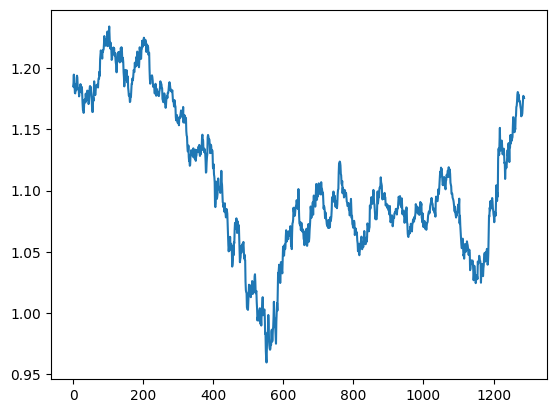

In [48]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['T_F'])

In [49]:
dates=data['Date'].to_numpy()
middle_matrix =data[['T-4','T-3','T-2','T-1','T0','SMA_5_H','SMA_5_L','EMA_5_C','RSI']].to_numpy()
X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
Y=data['T_F']

print(dates.shape)
print(X.shape)
print(Y.shape)

(1288,)
(1288, 9, 1)
(1288,)


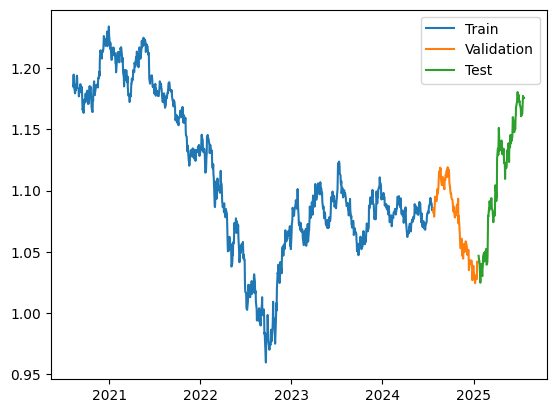

In [50]:
q_80 = int(len(dates) * .8) #change to 0.8
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], Y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], Y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization
import numpy as np
import time

def evaluate_network(lstm_units_1,epochs,learning_rate,dense_units_1,dense_units_2):

  lstm_units_1=int(lstm_units_1)
  epochs=int(epochs)
  dense_units_1=int(dense_units_1)
  dense_units_2=int(dense_units_2)

  model = Sequential([layers.Input((9, 1)),
                      layers.LSTM(lstm_units_1),
                      layers.Dense(dense_units_1, activation='relu'),
                      layers.Dense(dense_units_2, activation='relu'),
                      layers.Dense(1)])

  model.compile(loss='mse',
                optimizer=Adam(learning_rate=learning_rate),
                metrics=['mean_absolute_error'])


  # Train the model
  history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=0)

  # Return the loss (or another metric that you want to minimize)
  val_loss=min(history.history['val_loss'])
  loss=min(history.history['loss'])

  return -(val_loss*loss)  # Negative because BayesianOptimization maximizes, but we want to minimize loss



pbounds = {
    'lstm_units_1': (20, 300),
    'learning_rate': (1e-6, 1e-2),
    'epochs': (10, 150),
    'dense_units_1': (10, 200),
    'dense_units_2': (10, 200)
}

# Initialize Bayesian Optimization
optimizer = BayesianOptimization(
    f=evaluate_network,
    pbounds=pbounds,
    verbose=2,
    random_state=1,
    )

# Run the optimization
start_time = time.time()
optimizer.maximize(init_points=20, n_iter=40)
time_took = (time.time() - start_time)/60


# Get the best hyperparameters
print(f"Total runtime in mins: {time_took}")
best_params = optimizer.max['params']
print(f"Best hyperparameters: {best_params}")


|   iter    |  target   | lstm_u... | learni... |  epochs   | dense_... | dense_... |
-------------------------------------------------------------------------------------
| 1         | -3.51e-07 | 136.76616 | 0.0072035 | 10.016012 | 67.443188 | 37.883619 |
| 2         | -9.32e-08 | 45.854806 | 0.0018634 | 58.378501 | 85.385820 | 112.37517 |
| 3         | -2.77e-07 | 137.37446 | 0.0068525 | 38.623314 | 176.84231 | 15.203642 |
| 4         | -1.00e-07 | 207.73090 | 0.0041736 | 88.216575 | 36.673518 | 47.639282 |
| 5         | -6.13e-08 | 244.20847 | 0.0096826 | 53.879384 | 141.54129 | 176.51393 |
| 6         | -8.19e-08 | 270.48986 | 0.0008513 | 15.467669 | 42.267779 | 176.84707 |
| 7         | -8.07e-08 | 47.537113 | 0.0042116 | 144.10453 | 111.30140 | 141.45665 |
| 8         | -2.49e-09 | 108.34437 | 0.0068653 | 126.84759 | 13.474772 | 152.52741 |
| 9         | -7.36e-08 | 296.88110 | 0.0074819 | 49.262158 | 159.96307 | 29.612941 |
| 10        | -2.71e-09 | 145.41018 | 0.0090860 | 51.1

Epoch 1/127
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3536 - mean_absolute_error: 0.4335 - val_loss: 0.0163 - val_mean_absolute_error: 0.1054
Epoch 2/127
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0063 - mean_absolute_error: 0.0642 - val_loss: 0.0107 - val_mean_absolute_error: 0.0773
Epoch 3/127
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0042 - mean_absolute_error: 0.0540 - val_loss: 0.0073 - val_mean_absolute_error: 0.0512
Epoch 4/127
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0038 - mean_absolute_error: 0.0526 - val_loss: 0.0067 - val_mean_absolute_error: 0.0533
Epoch 5/127
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0039 - mean_absolute_error: 0.0530 - val_loss: 0.0059 - val_mean_absolute_error: 0.0546
Epoch 6/127
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0038 - mean_absolute_error: 0.0518 - val_loss: 0.0031 - val_mean_absolute_error: 0.0313
Epoch 7/127
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0504 - v

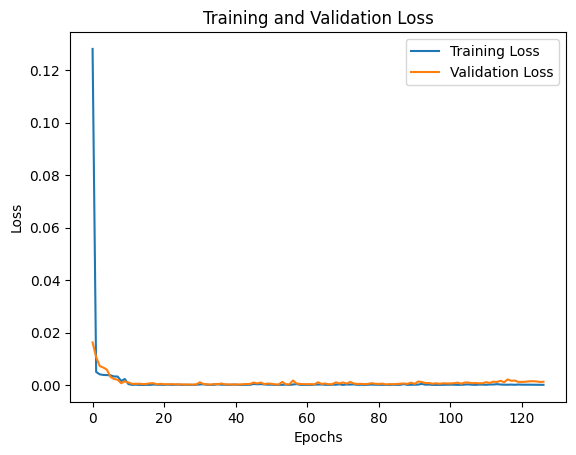

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# model = Sequential([layers.Input((9, 1)),
#                     layers.LSTM(64),
#                     layers.Dense(1)])

model = Sequential([layers.Input((9, 1)),
                   layers.LSTM(108),
                   layers.Dense(13, activation='relu'),
                   layers.Dense(152, activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.006865322775888156),
              metrics=['mean_absolute_error'])


history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=127)

print(history.history.keys())

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


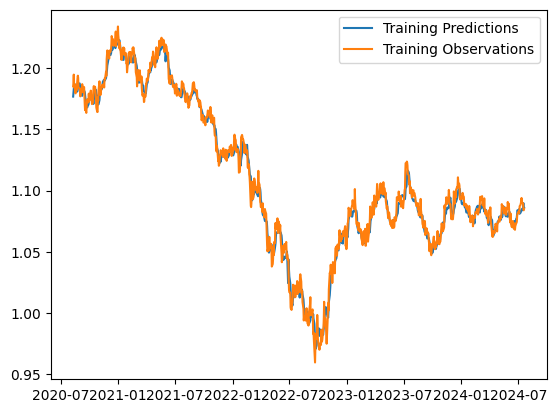

In [53]:
from sklearn.metrics import mean_squared_error

train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

52.30129995388341


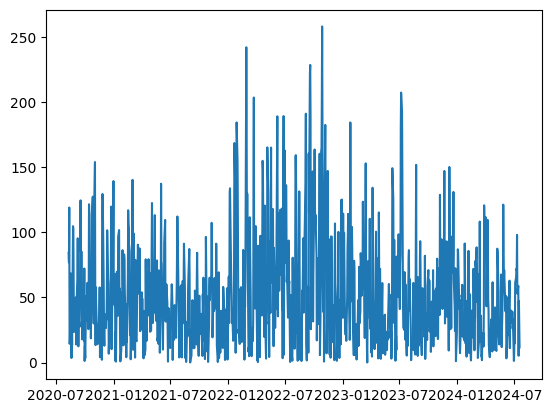

In [54]:
import numpy as np

basis_point_value=0.0001  #For EURUSD pair
train_data_basis_point_diff=((train_predictions/basis_point_value).flatten()-y_train/basis_point_value).abs()
plt.plot(dates_train, train_data_basis_point_diff)

average_train_data_basis_point_diff=np.mean(train_data_basis_point_diff)
print(average_train_data_basis_point_diff)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


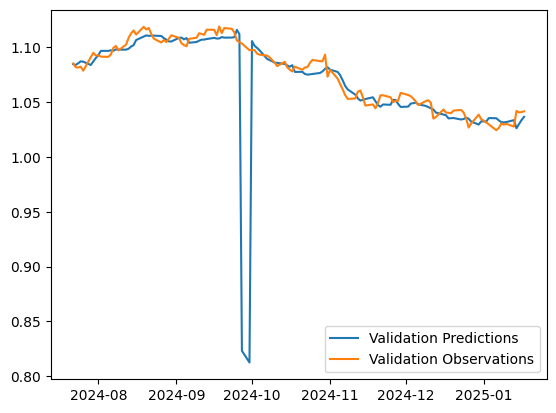

In [55]:
val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

98.09024523376932


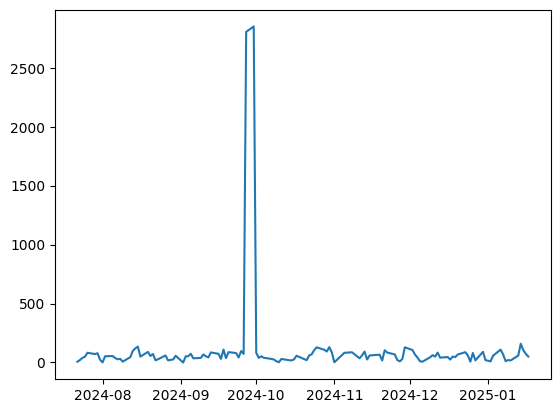

In [56]:
basis_point_value=0.0001  #For EURUSD pair
validation_data_basis_point_diff=((val_predictions/basis_point_value).flatten()-y_val/basis_point_value).abs()
plt.plot(dates_val, validation_data_basis_point_diff)

print(np.mean(validation_data_basis_point_diff))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


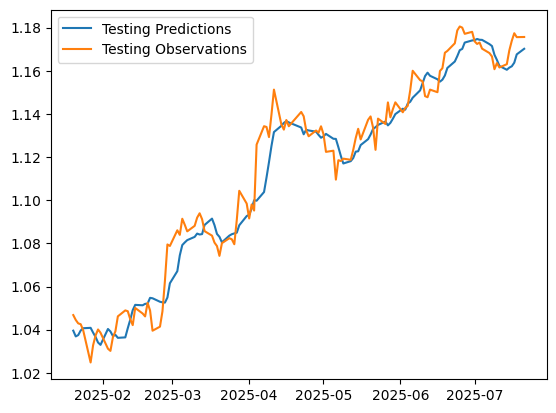

In [57]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Assuming test_predictions and y_test are lists or numpy arrays
# Calculate MSE and MAE
mse = mean_squared_error(y_test, test_predictions)
print("Mean Square Error:", mse)
mae=mean_absolute_error(y_test, test_predictions)
print("Mean Absolute Error:", mae)

Mean Square Error: 7.771790916856656e-05
Mean Absolute Error: 0.006754853008755469


67.54846850532931


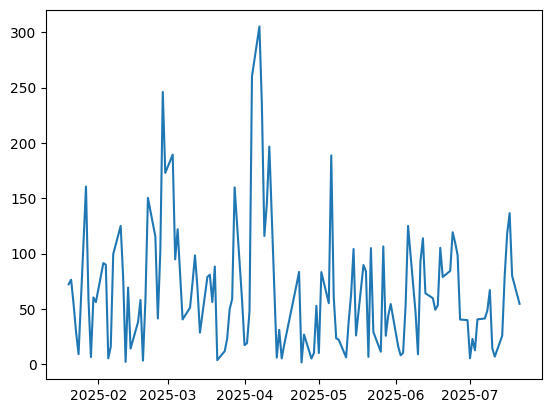

In [59]:
basis_point_value=0.0001  #For EURUSD pair
test_data_basis_point_diff=((test_predictions/basis_point_value).flatten()-y_test/basis_point_value).abs()
plt.plot(dates_test, test_data_basis_point_diff)

print(np.mean(test_data_basis_point_diff))

In [60]:
#Start Trading with 1000 USD with model


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_predictions[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_predictions[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)


129
1066.210408245919
quote


In [61]:
#Start Trading with 1000 USD with actual values


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_data[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_data[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)

129
1395.7603264608163
base


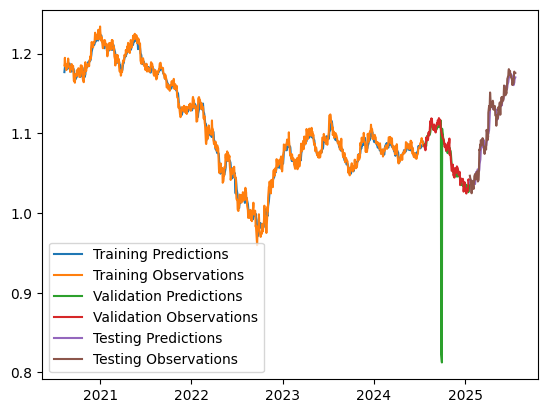

In [62]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])